# **Dataset**: Mall_customers
# **Algorithm**: K-Means

### links: 

https://www.kaggle.com/shwetabh123/mall-customers?select=Mall_Customers.csv

https://minerandodados.com.br/analise-e-agrupamento-de-clientes-com-machine-learning-k-means/


# Introdução

O K-means é um algoritmo de aprendizado de máquina não supervisionado, ou seja, temos apenas as variáveis independentes e nenhuma variável de destino.

Por conta disso precisamos recorrer à agrupadores lógicos de segmentação, com a finalidade de encontrar similaridade entre os dados da amostra.

O objetivo é encontrar um padrão e assumir que esse padrão é o que estamos tentando ensinar ao computador, que por sua vez, vai reproduzir e encontrar esse padrão sempre quando for solicitado.

Depois de descoberto o padrão, qualquer item novo que tenha uma similaridade com aquele segmento (agrupamento – cluster) fará parte daquele grupo.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected = True)

# Análise de dados

In [18]:
# Carregando a base de dados
df = pd.read_csv('Mall_Customers.csv')

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
# Verificando os dados:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# Número de linhas e colunas:
df.shape

(200, 5)

In [22]:
# número de linhas
df.shape[0]

200

In [23]:
# número de colunas 
df.shape[1]

5

In [24]:
# Nome das colunas
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**CustomerID** – código do cliente

**Gender** – Sexo

**Age** – Idade

**Annual Income** (k$) – Renda anual (k = mil)

**Spending Score (1-100)** – Pontuação de gastos (1 gasto baixo, 100 gasto alto)

In [25]:
# Estatística Descritiva
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
# tipos de dados:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [27]:
# Verificando registros nulos:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visualização de dados

In [28]:
# Definindo um estilo para os gráficos
plt.style.use('fivethirtyeight')

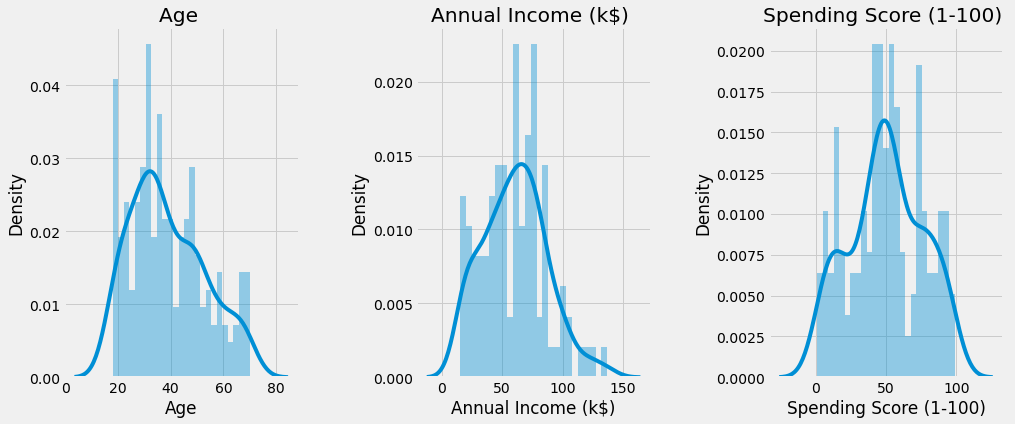

In [29]:
# Verificando a distribuição dos dados:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

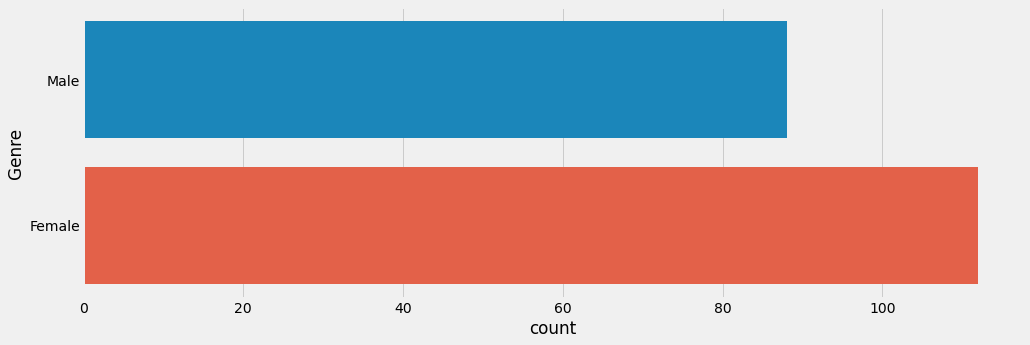

In [31]:
# Contagem de Amostras por sexo:
plt.figure(1, figsize = (15,5))
sns.countplot(y = 'Genre', data = df)
plt.show()

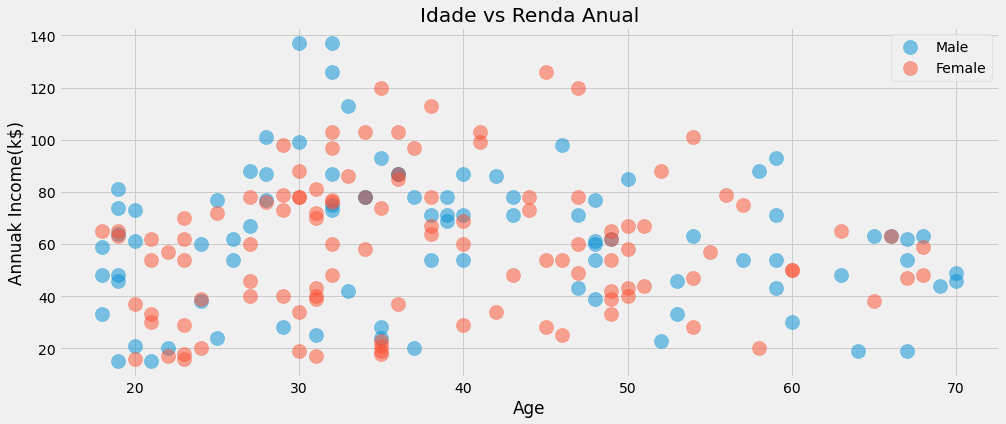

In [32]:
# Investigando relação linear entre atributos
# Idade vs Renda Anual:
plt.figure(1, figsize =(15, 6) )
for gender in ['Male', 'Female']:
    plt.scatter( x = 'Age', y = 'Annual Income (k$)', data =df[df['Genre']==gender],
               s = 200, alpha =0.5, label = gender)
plt.xlabel('Age'), plt.ylabel('Annuak Income(k$)')
plt.title('Idade vs Renda Anual')
plt.legend()
plt.show()

Maiores rendas estão entre os jovens.

Conforme a idade aumenta a renda anual diminui.

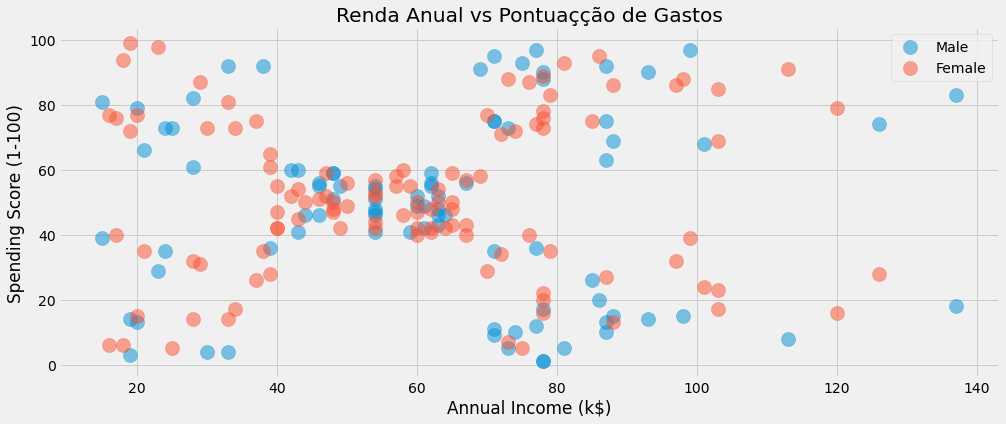

In [37]:
plt.figure(1, figsize = (15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
    data = df[df['Genre'] == gender], s = 200, alpha = 0.5, label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Renda Anual vs Pontuaçção de Gastos')
plt.legend()
plt.show()


Nesse gráfico os dados estão bem distribuídos com uma maior concentração na faixa etária de 40 a 65 anos e com a pontuação entre 40 e 60 pontos.

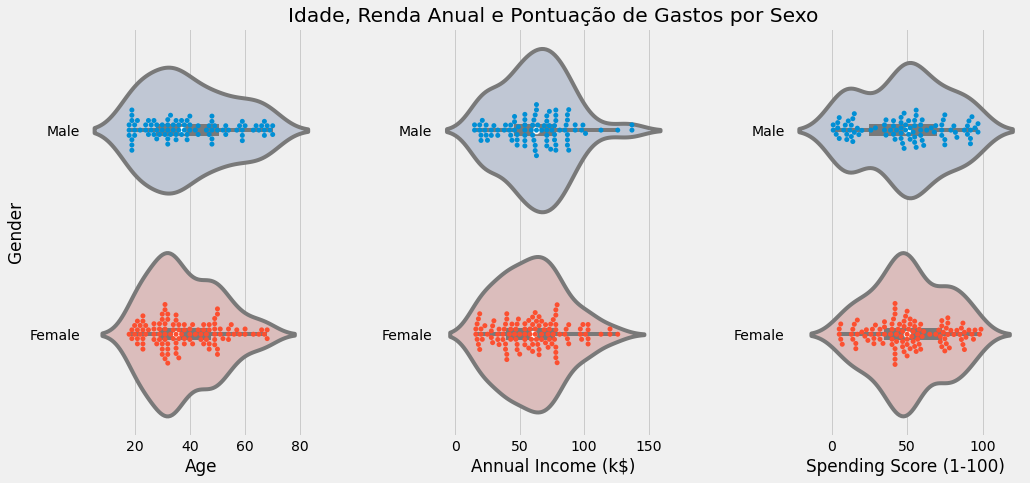

In [40]:
# Distribuição de Idade, Renda Anual e Pontuação de Gastos segmentado por Sexo:
plt.figure(1, figsize = (15, 7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Genre', data  = df, palette = 'vlag')
    sns.swarmplot(x = cols, y = 'Genre', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Idade, Renda Anual e Pontuação de Gastos por Sexo' if n == 2 else '')
plt.show() 

Considerando os três atributos que estamos comparando em relação ao sexo, a maior diferença está na pontuação, com uma concentração em torno de 50 e 80 pontos para as mulheres.

# Agrupamento de dados utilizando o k-Means

## Parâmetros:

**n_clusters**: número de clusters que queremos gerar com os nossos dados.
    
**init**: se refere ao modo como o algoritmo será inicializado. k-means++: É o método padrão, e os centroides serão
gerados utilizando um método inteligente que favorece a convergência. random: Se refere ao modo de inicialização de forma aleatória,
ou seja, os centroides iniciais serão gerados de forma totalmente aleatória sem um critério para seleção. ndarray: array de valores
indicando qual seriam os centroides que o algoritmo deveria utilizar para a inicialização .

**max_iter**: Quantidade máxima de vezes que o algoritmo irá executar, por padrão o valor é 300 iterações.

**n_jobs**: Quantos CPU´s iremos utilizar para executar o K-means.
    
**algorithm**: Versão do algoritmo K-Means a ser utilizada. A versão clássica é executada através do valor full.

## Método Elbow

In [41]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = KMeans(n_clusters = n)
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

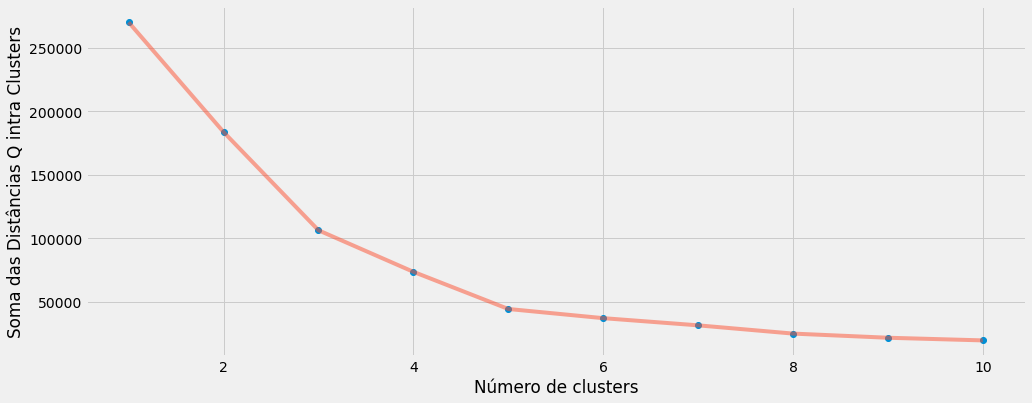

In [42]:
plt.figure(1,figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Número de clusters'), plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Conforme o número de clusters aumenta a soma das distâncias quadráticas intra clusters diminui.

Quando a diferença entre a distância é quase insignificante temos o valor ótimo de k.

No nosso caso esse valor seria igual a 4.

In [47]:
# Inicializando e computando o KMeans com o valor de 4 clusters:

algorithm = KMeans(n_clusters = 4)
algorithm.fit(X2)

KMeans(n_clusters=4)

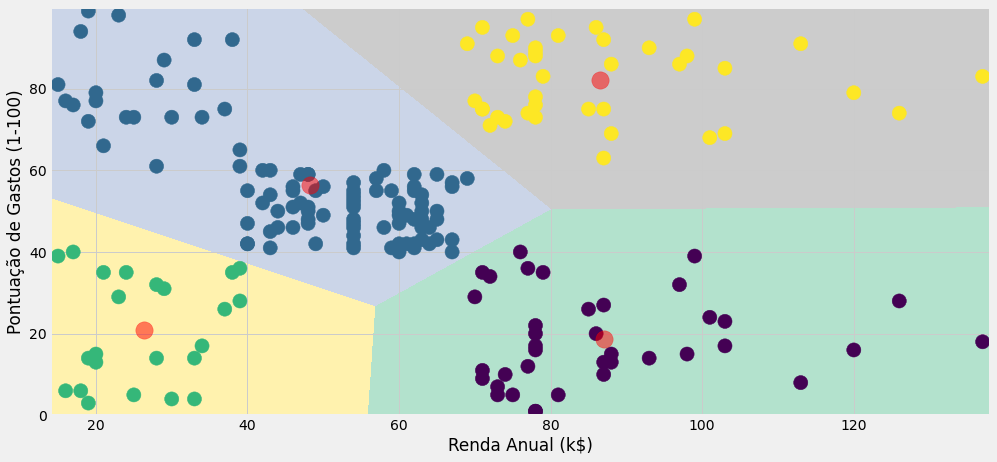

In [50]:
# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Pontuação de Gastos (1-100)') , plt.xlabel('Renda Anual (k$)')
plt.show()

Solicitamos ao K-means que os dados fossem separados em 4 grupos e cada grupo têm o seu centroide correspondente (ponto em vermelho).

O centroide é o ponto de partida para cada cluster é a partir dele que todos os outros pontos fazem o cálculo de distância para definir a qual grupo o dado irá pertencer.

# Atributos Importantes

**inertia**: Soma das distâncias quadráticas intra cluster.

**labels_**: Rótulos dos Clusters atribuídos.

**cluster_centers_**: Valores dos Centroides.

# Analisando os dados agrupados

In [ ]:
df['clusters'] = algorithm.labels_
df.head()

In [ ]:
# Excluindo as colunas que não foram utilizadas
df_group = df.drop(['CustomerID', 'Age'], axis = 1).groupby('Clusters')

In [ ]:
# Estatística descritiva dos grupos
df_group.describe()